In [1]:
import os
import sys
sys.path.append(os.getcwd() + '/../vic3analyze')

In [2]:
from database import get_db
from sqlalchemy.orm import Session
from sqlalchemy.sql import text

db = get_db()

In [3]:
from tables.country_basics import CountryBasics
from tables.market_goods import MarketGoods
from tables.metadata import RunMetadata, SampleMetadata

from sqlalchemy import select
import pandas as pd

In [4]:
df = pd.read_sql(select(RunMetadata).join(SampleMetadata), db.connect())
df.groupby(['id']).size()

id
7ae7b4ae-0ddb-42f2-bea1-eb4bdf473b7e    285
f930ebdb-d1e0-4068-a6dd-e8e3b6326f87     12
dtype: int64

In [5]:



stmt = (
    select(CountryBasics)
    .where(CountryBasics.tag.in_(('GBR', 'FRA', 'PRU', 'RUS', 'AUS', 'USA', 'JAP')))
)
countries = pd.read_sql(stmt, db.connect())
stmt = (
    select(MarketGoods, CountryBasics)
    .join(MarketGoods.owner_country)
    .where(MarketGoods.good_id.in_(('steel', 'iron', 'coal', 'engines')))
    .where(CountryBasics.tag == 'GBR')
)
markets = pd.read_sql(stmt, db.connect())
markets = markets.groupby(['good_id', 'game_date', 'run_id']).sum(numeric_only=True)
markets = markets.groupby(['good_id', 'game_date']).mean()
markets

market_id  owner_db_id  buildings_supply  \
good_id game_date                                              
coal    1836-02-01     1485.0        297.0      5.177304e+05   
        1836-03-01     1485.0        297.0      5.177304e+05   
        1836-04-01     1485.0        297.0      5.177304e+05   
        1836-05-01     1485.0        297.0      5.177304e+05   
        1836-06-01     1485.0        297.0      5.177304e+05   
...                       ...          ...               ...   
steel   1860-02-01     1485.0        297.0      1.039896e+06   
        1860-03-01     1485.0        297.0      1.041209e+06   
        1860-04-01     1485.0        297.0      1.004197e+06   
        1860-05-01     1485.0        297.0      1.005586e+06   
        1860-06-01     1485.0        297.0      1.005661e+06   

                    buildings_demand  trade_supply  trade_demand  db_id  \
good_id game_date                                                         
coal    1836-02-01     499882.994325           0.0           0.0  297.0   
        1836-03-01     509870.121255           0.0           0.0  297.0   
        1836-04-01     525704.949495           0.0           0.0  297.0   
        1836-05-01     538239.166245           0.0           0.0  297.0   
        1836-06-01     546072.156630           0.0           0.0  297.0   
...                              ...           ...           ...    ...   
steel   1860-02-01     964035.166050           0.0        5940.0  297.0   
        1860-03-01     964024.257240           0.0        5940.0  297.0   
        1860-04-01     939735.623970           0.0        5940.0  297.0   
        1860-05-01     971689.322340           0.0        5940.0  297.0   
        1860-06-01     950264.668980           0.0        5940.0  297.0   

                             gdp  prestige  standard_of_living    population  \
good_id game_date                                                              
coal    1836-02-01  3.258600e+08  421050.0          4192.49937  7.742295e+09   
        1836-03-01  3.258600e+08  421050.0          4192.49937  7.742295e+09   
        1836-04-01  3.258600e+08  421050.0          4192.49937  7.742295e+09   
        1836-05-01  3.258600e+08  421050.0          4192.49937  7.742295e+09   
        1836-06-01  3.258600e+08  421050.0          4192.49937  7.742295e+09   
...                          ...       ...                 ...           ...   
steel   1860-02-01  3.258600e+08  421050.0          4192.49937  7.742295e+09   
        1860-03-01  3.258600e+08  421050.0          4192.49937  7.742295e+09   
        1860-04-01  3.258600e+08  421050.0          4192.49937  7.742295e+09   
        1860-05-01  3.258600e+08  421050.0          4192.49937  7.742295e+09   
        1860-06-01  3.258600e+08  421050.0          4192.49937  7.742295e+09   

                        radicals    loyalists      treasury  investment_pool  \
good_id game_date                                                              
coal    1836-02-01  1.372717e+09  163319135.0  5.287915e+09     2.331344e+08   
        1836-03-01  1.372717e+09  163319135.0  5.287915e+09     2.331344e+08   
        1836-04-01  1.372717e+09  163319135.0  5.287915e+09     2.331344e+08   
        1836-05-01  1.372717e+09  163319135.0  5.287915e+09     2.331344e+08   
        1836-06-01  1.372717e+09  163319135.0  5.287915e+09     2.331344e+08   
...                          ...          ...           ...              ...   
steel   1860-02-01  1.372717e+09  163319135.0  5.287915e+09     2.331344e+08   
        1860-03-01  1.372717e+09  163319135.0  5.287915e+09     2.331344e+08   
        1860-04-01  1.372717e+09  163319135.0  5.287915e+09     2.331344e+08   
        1860-05-01  1.372717e+09  163319135.0  5.287915e+09     2.331344e+08   
        1860-06-01  1.372717e+09  163319135.0  5.287915e+09     2.331344e+08   

                    credit_limit  
good_id game_date                 
coal    1836-02-01  6.331777e+09  
        1836-03-01  6.33

<AxesSubplot: xlabel='game_date', ylabel='buildings_supply'>

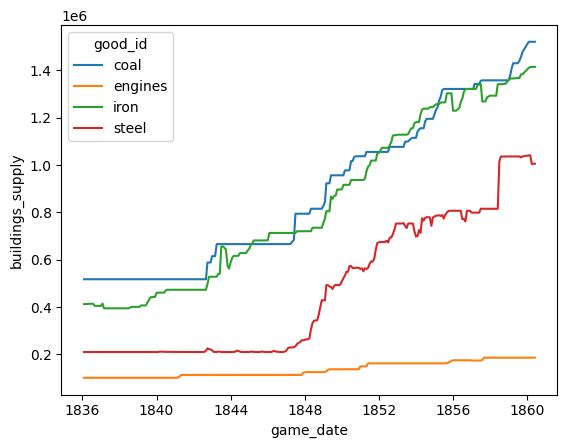

In [6]:
import seaborn
#seaborn.lineplot(countries, x='game_date', y='prestige', hue='tag')
seaborn.lineplot(markets, x='game_date', y='buildings_supply', hue='good_id')